# Clustering

#### Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

## Data Preprocessing:

In [78]:
#import pandas library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [79]:
#Load the Excel file
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [80]:
#Set ID as Index Column
df.set_index('ID#',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [81]:
#Get datatypes
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [82]:
#get dataset shape
df.shape

(3999, 11)

#### 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

######  **handle missing values**

In [83]:
#Get null values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

######  **Duplicate rows**

In [84]:
#check for duplicate rows
df.duplicated().sum()

# Display duplicates
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [86]:
# Remove duplicates
df = df.drop_duplicates()
#check for duplicate rows
df.duplicated().sum()

np.int64(0)

######  **Check outliers**

In [87]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

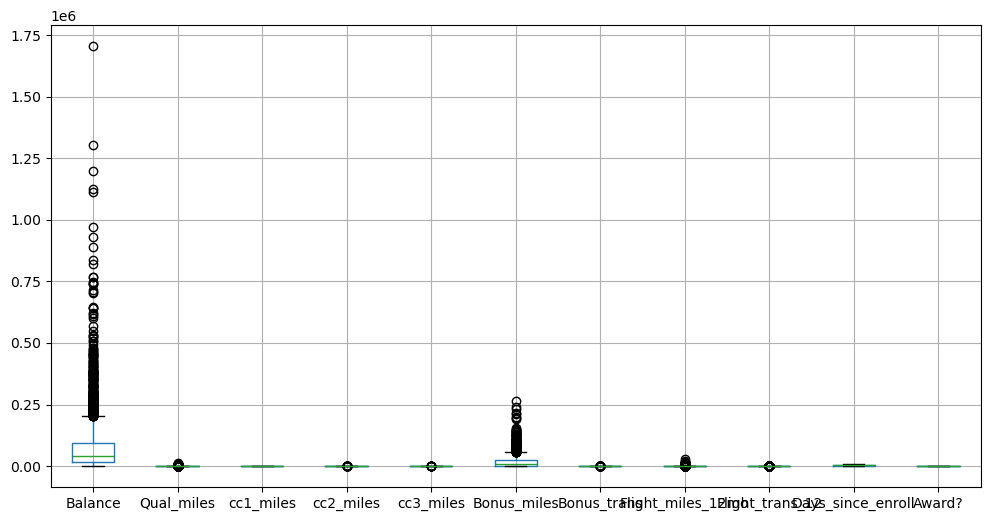

In [88]:
#Check for outliers
plt.figure(figsize=(12, 6))
df.boxplot()

In [89]:
#Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

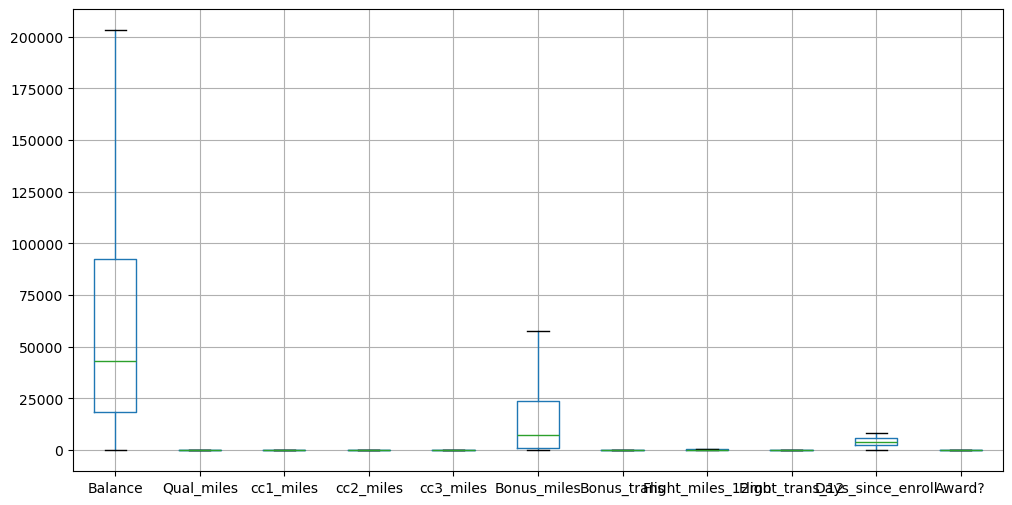

In [90]:
#Check for outliers
plt.figure(figsize=(12, 6))
df.boxplot()

######  **Scaling**

In [91]:
#import standardization
from sklearn.preprocessing import StandardScaler

In [92]:
# apply standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Convert back to DataFrame with same columns and index
df = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,-0.607541,0.0,-0.769732,0.0,0.0,-0.843179,-1.149253,-0.603723,-0.626252,1.395235,-0.767072
2,-0.759235,0.0,-0.769732,0.0,0.0,-0.840911,-1.039523,-0.603723,-0.626252,1.379736,-0.767072
3,-0.382343,0.0,-0.769732,0.0,0.0,-0.624728,-0.820064,-0.603723,-0.626252,1.411702,-0.767072
4,-0.835397,0.0,-0.769732,0.0,0.0,-0.825145,-1.149253,-0.603723,-0.626252,1.371987,-0.767072
5,0.579028,0.0,1.409207,0.0,0.0,1.542468,1.593991,2.039825,2.019866,1.363754,1.303659


#### 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

In [93]:
#get summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3998.0,7.108982e-17,1.000125,-1.087272,-0.771333,-0.351933,0.487882,2.376706
Qual_miles,3998.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cc1_miles,3998.0,-1.421796e-16,1.000125,-0.769732,-0.769732,-0.769732,0.682894,2.135519
cc2_miles,3998.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cc3_miles,3998.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bonus_miles,3998.0,0.000000e+00,1.000125,-0.852804,-0.783657,-0.455455,0.464360,2.336386
Bonus_trans,3998.0,4.265389e-17,1.000125,-1.258983,-0.929794,0.057774,0.606423,2.910748
Flight_miles_12mo,3998.0,0.000000e+00,1.000125,-0.603723,-0.603723,-0.603723,0.453696,2.039825
Flight_trans_12,3998.0,2.132695e-17,1.000125,-0.626252,-0.626252,-0.626252,0.432195,2.019866
Days_since_enroll,3998.0,0.000000e+00,1.000125,-1.994039,-0.865936,-0.010505,0.809570,2.022914


In [94]:
#Correlation metrics
corr = df.corr()
corr

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,NaN,0.446404,NaN,NaN,0.494306,0.408822,0.296904,0.295454,0.285911,0.170509
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,0.446404,NaN,1.000000,NaN,NaN,0.912504,0.627714,0.098541,0.087508,0.230674,0.335358
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,0.494306,NaN,0.912504,NaN,NaN,1.000000,0.663456,0.205662,0.193576,0.217124,0.393956
Bonus_trans,0.408822,NaN,0.627714,NaN,NaN,0.663456,1.000000,0.310720,0.308397,0.169989,0.337294
Flight_miles_12mo,0.296904,NaN,0.098541,NaN,NaN,0.205662,0.310720,1.000000,0.942673,0.094890,0.293117
Flight_trans_12,0.295454,NaN,0.087508,NaN,NaN,0.193576,0.308397,0.942673,1.000000,0.091728,0.300002
Days_since_enroll,0.285911,NaN,0.230674,NaN,NaN,0.217124,0.169989,0.094890,0.091728,1.000000,0.187936


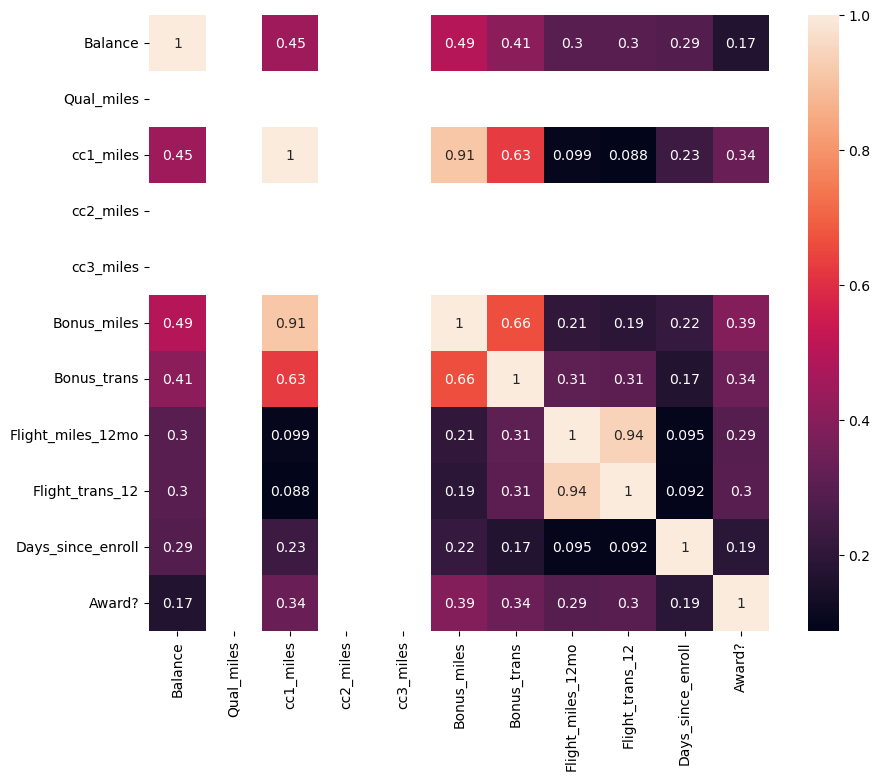

In [95]:
#plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True)
plt.show()

#### 3.	Use multiple visualizations to understand the hidden patterns in the dataset

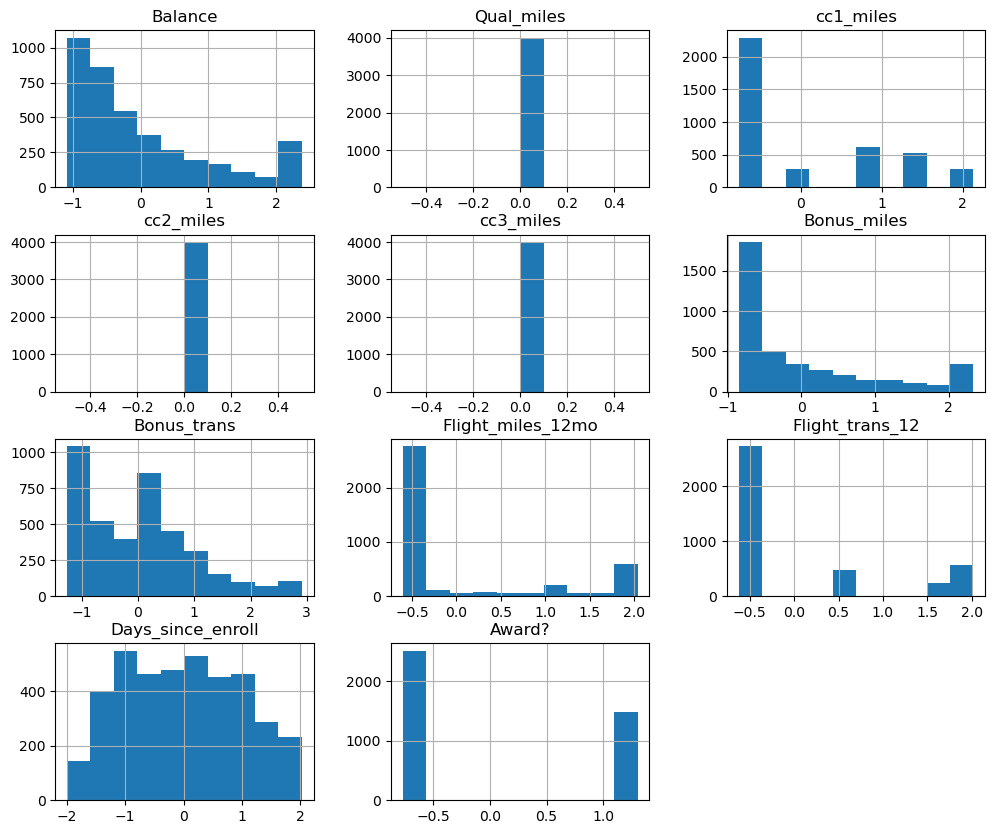

In [96]:
#Histogram
df.hist(figsize=(12,10))
plt.show()

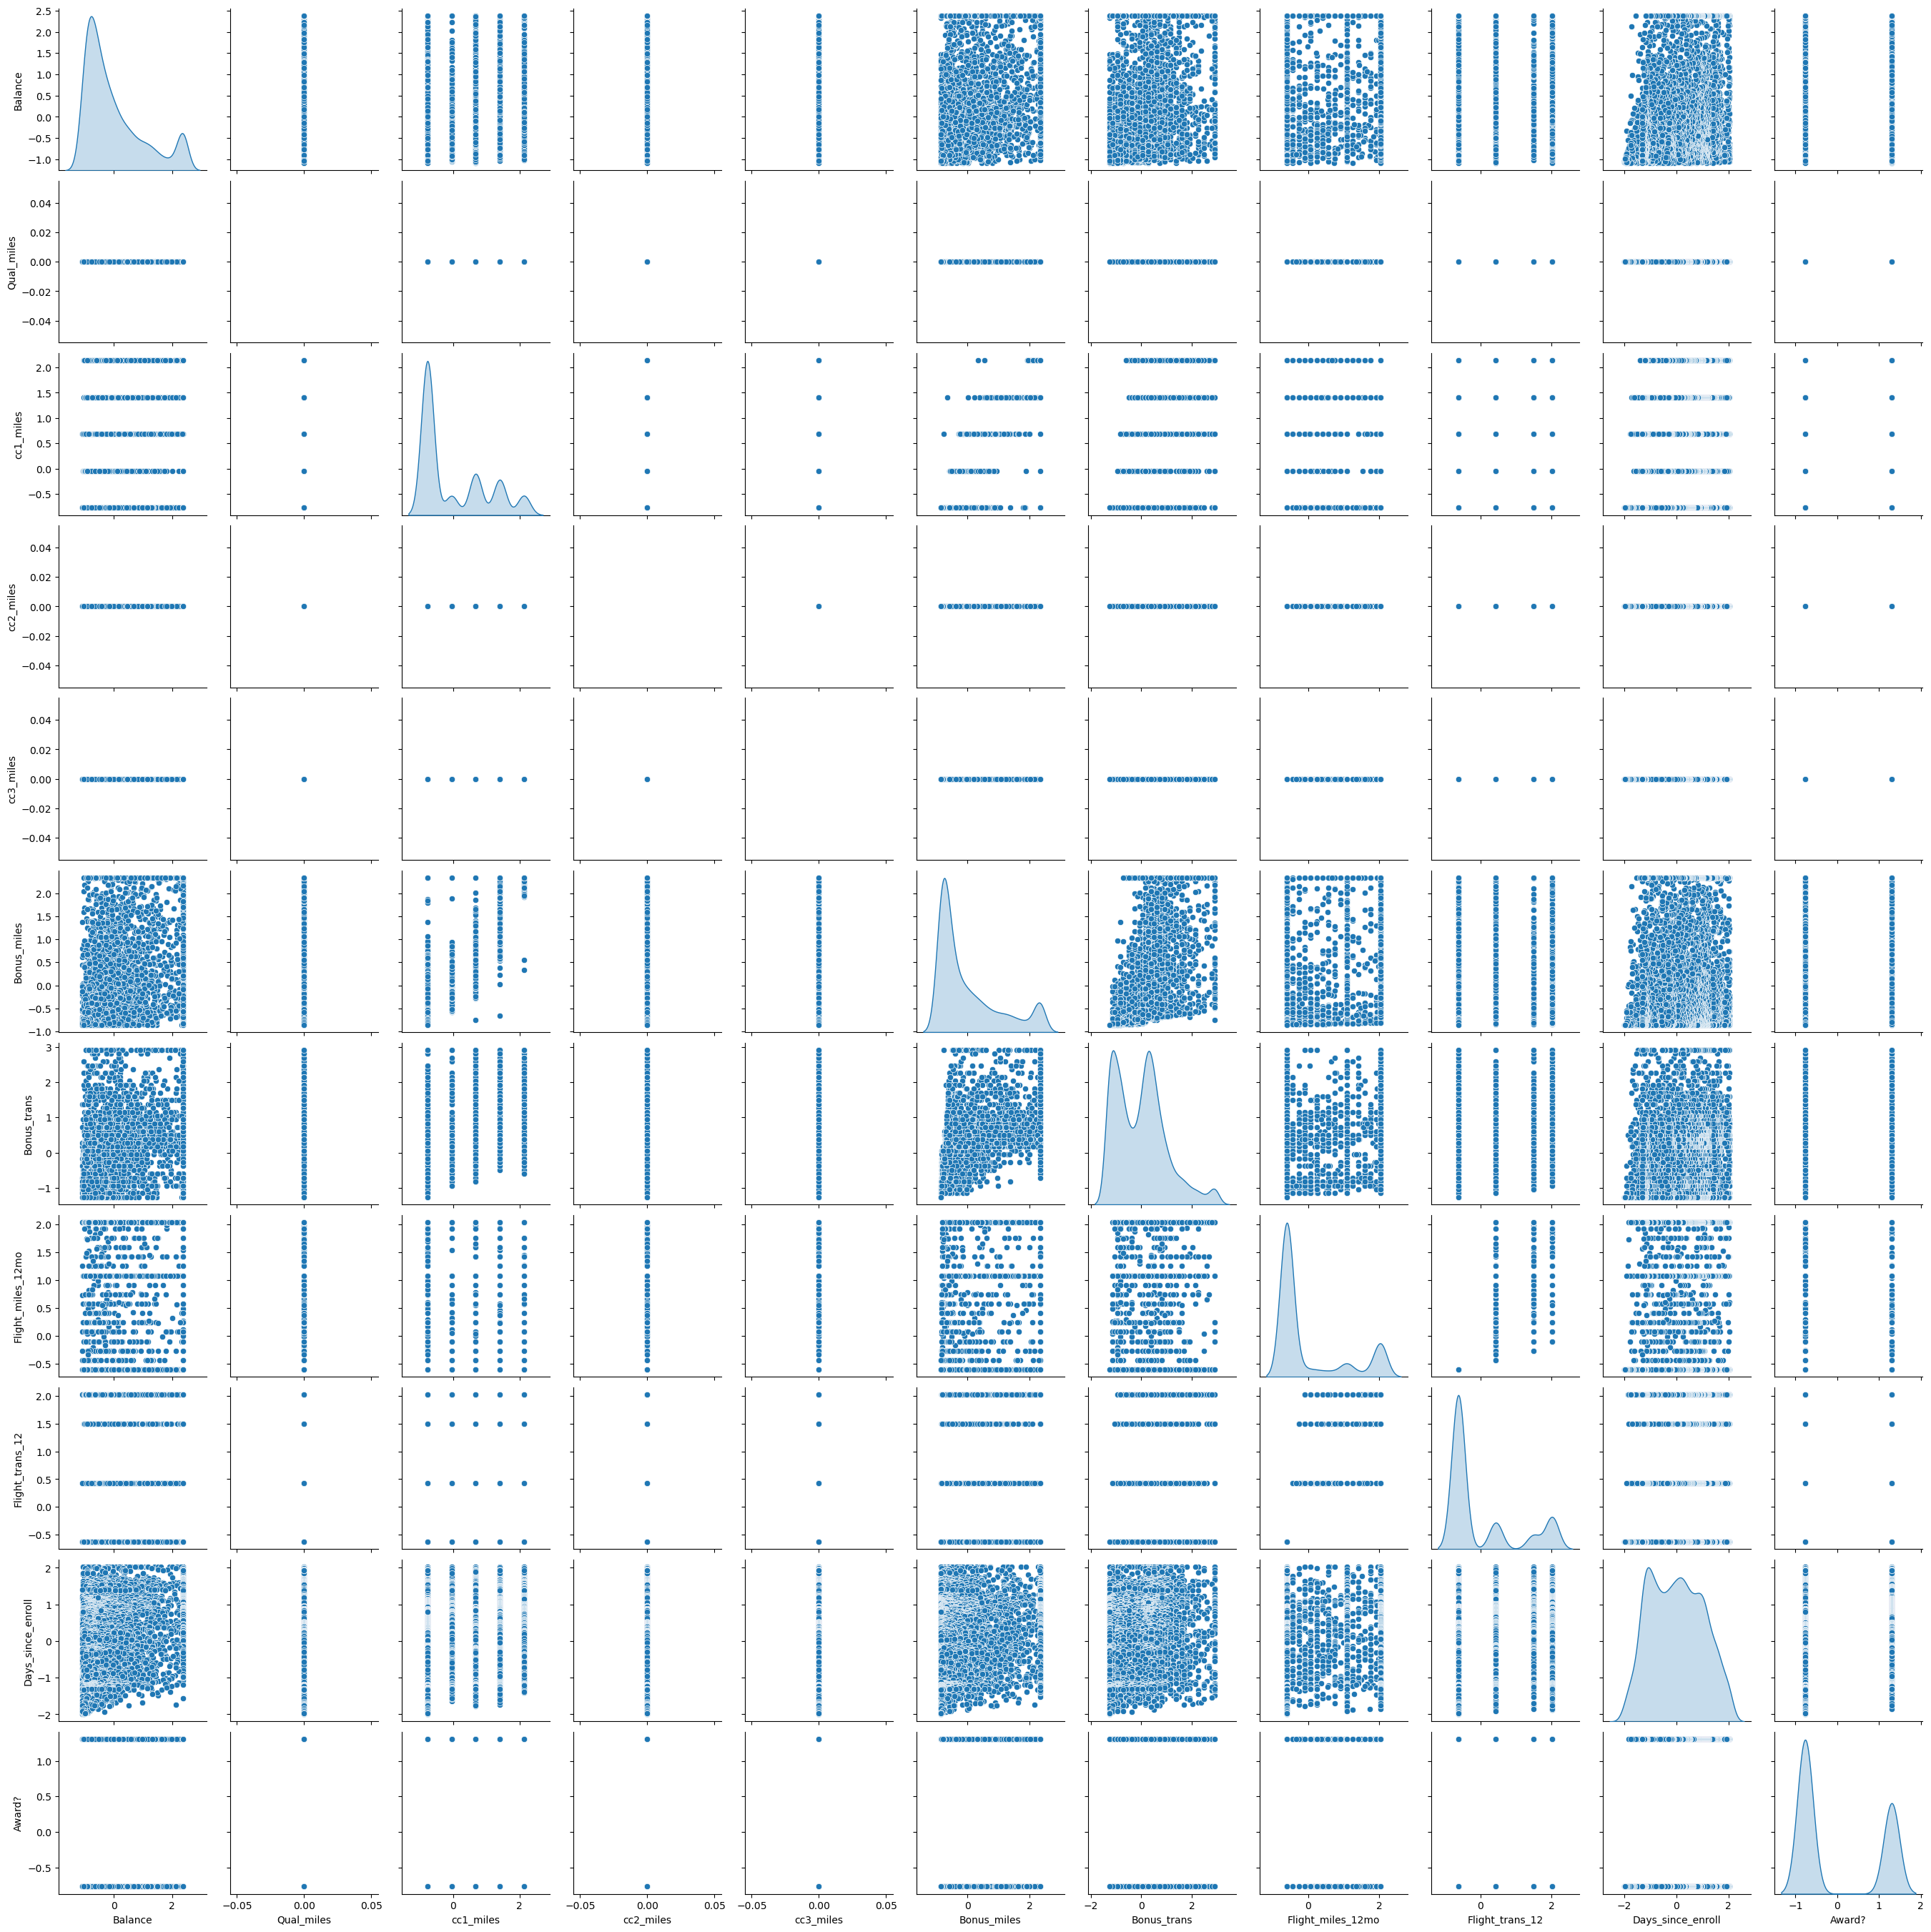

In [97]:
# dataset is in a DataFrame called df
sns.pairplot(df, diag_kind='kde')   # 'kde' gives smooth density plots on the diagonal
plt.show()

## Implementing Clustering Algorithms:

#### 1.	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [98]:
#import clustering libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

#### 2.	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

##### **K-Means**

In [99]:
#Apply K-means clustering
k = 3   
kmeans = KMeans(n_clusters=k, random_state=42)
display(kmeans)
labels_kmeans = kmeans.fit_predict(df)

#Evaluate clusters
print("Silhouette Score (K-Means):", silhouette_score(df, labels_kmeans))


KMeans(n_clusters=3, random_state=42)

Silhouette Score (K-Means): 0.3294299201307006


##### **Hierarchical Clustering**

In [100]:
# Try Ward linkage (minimizes variance within clusters)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
display(hc)
labels_hc = hc.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster_HC'] = labels_hc

#Evaluate clusters
score = silhouette_score(df, labels_hc)
print("Silhouette Score (Hierarchical):", score)

AgglomerativeClustering(n_clusters=3)

Silhouette Score (Hierarchical): 0.2695534412444361


##### **DBSCAN**

In [101]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
display(dbscan)
labels_dbscan = dbscan.fit_predict(df)

# Add cluster labels to DataFrame
df['Cluster_DBSCAN'] = labels_dbscan

# Only evaluate if more than 1 cluster is found
if len(set(labels_dbscan)) > 1:
    score = silhouette_score(df, labels_dbscan)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("All points classified as noise or single cluster.")

DBSCAN()

Silhouette Score (DBSCAN): 0.2671006981924322


#### 3.	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

##### **K-means (Elbow curve for different K values)**

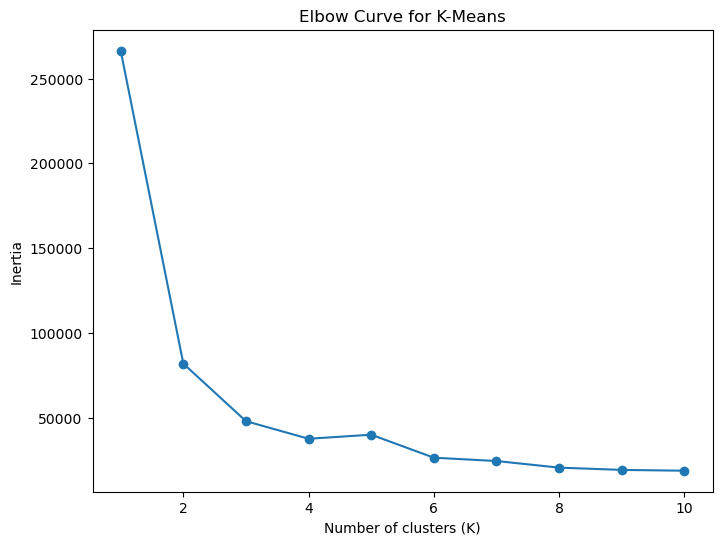

In [102]:
#Prepare Inertia for diffrent K value
inertia = []
K_range = range(1, 11)  # test K from 1 to 10

#Choose k values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

#Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means')
plt.show()


In [103]:
#Create K-means clustering based on elbow curve value
k = 6 
kmeans = KMeans(n_clusters=k, random_state=42)
display(kmeans)
labels_kmeans = kmeans.fit_predict(df)
Kmeans_score =silhouette_score(df, labels_kmeans)

#Evaluate clusters
print("Silhouette Score (K-Means):", Kmeans_score)

KMeans(n_clusters=6, random_state=42)

Silhouette Score (K-Means): 0.392758747966832


##### **Hierarchical clustering (Linkage criteria)**

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Assume df is your standardized DataFrame
X = df.values

# Try different linkage criteria
for method in ['ward', 'complete', 'average', 'single']:
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = hc.fit_predict(df)
    score = silhouette_score(X, labels)
    print(f"Linkage={method}, Silhouette Score={score:.3f}")


Linkage=ward, Silhouette Score=0.601
Linkage=complete, Silhouette Score=0.648
Linkage=average, Silhouette Score=0.695
Linkage=single, Silhouette Score=0.449


In [105]:
#Create Hierarchical clustering based on Silhouette linkage score value
h_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
display(h_cluster )
labels = h_cluster.fit_predict(df)
H_score = silhouette_score(X, labels)
print(f"Silhouette Score={H_score:.3f}")

AgglomerativeClustering(n_clusters=3)

Silhouette Score=0.601


##### **DBSCAN (epsilon, minPts)**

In [106]:
#Select eps and min points
eps = np.arange(0.1, 0.7, 0.1)
min_nodes = range(1, 10)

#generate labels
score = []
for ep in eps:
    for mn in min_nodes:
        labels = DBSCAN(eps=ep, min_samples=mn).fit(df).labels_
        s_score = silhouette_score(df, labels)
        score.append((ep, mn, s_score))

#Choose best score points
a=pd.DataFrame(score,columns=['eps','min_pts','s_score'])
max_pts=a.loc[:,'s_score'].max()
a[a.s_score==max_pts]

,eps,min_pts,s_score
40,0.5,5,0.261228


In [107]:
#Create DBSCAN based on highest silhouette_score points
db_scan =  DBSCAN(eps=0.5, min_samples=5)
display(db_scan)
labels = db_scan.fit(df).labels_
DBSCAN_score = silhouette_score(df, labels)

#print silhouette_score and labels generated
print("DBSCAN_score:",DBSCAN_score)
print("Labels:",np.unique(labels))

DBSCAN()

DBSCAN_score: 0.2612283760622499
Labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


## Cluster Analysis and Interpretation:

#### 1.	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

###### **Evaluate Clustering Results**

In [108]:
#create dictionary
Cluster_comp = {
            'Cluster_Alg': ["K-Means", "Hierarchical ", "DBSCAN"],
            'Silhouette Score': [f"{Kmeans_score:.4f}",f"{H_score:.4f}",f"{DBSCAN_score:.4f}"],
}
#Create DataFrame
cls_comp=pd.DataFrame(Cluster_comp)
print("Cluster Evaluation Result:")
cls_comp

Cluster Evaluation Result:


,Cluster_Alg,Silhouette Score
0,K-Means,0.3928
1,Hierarchical,0.6014
2,DBSCAN,0.2612


##### **Comparison of Clustering Algorithms (Silhouette Scores):**
- KMeans Silhouette Score: 0.3444
- Hierarchical Clustering Silhouette Score: 0.6655
- DBSCAN Silhouette Score: 0.2601


**Summary of Comparison:**

Based on the Silhouette Scores, both K-Means and DBSCAN Clustering achieved less scores compared to DBSCAN clustering. The K-Means score is slightly higher than DBSCAN Clustering.
on the other hand, Hierarchical clustering yielded a highest Silhouette Score.

## Visualization:

#### 1.Visualize the clustering results using scatter plots or other suitable visualization techniques.
#### 2.Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

##### **k-means visualization**

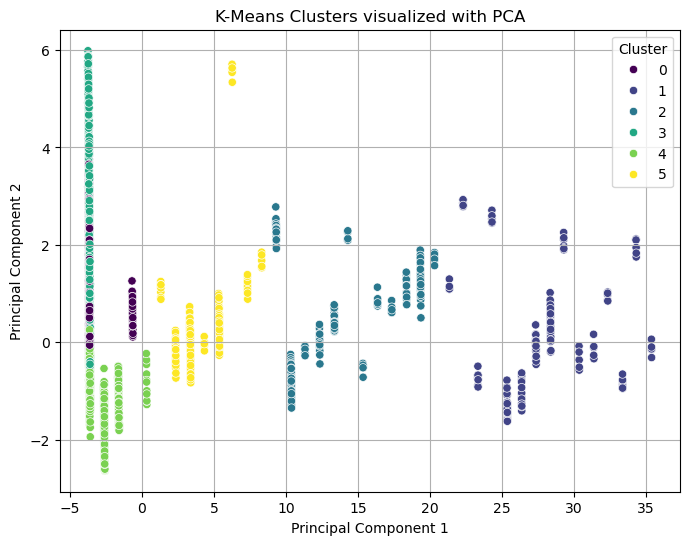

In [109]:
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Create a DataFrame for PCA results and add K-Means cluster labels
df_pca_kmeans = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'], index=df.index)
df_pca_kmeans['Cluster'] = labels_kmeans

# Plot the K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca_kmeans, palette='viridis', legend='full')
plt.title('K-Means Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

##### **Hierarchical clustering (Linkage criteria) visualization**

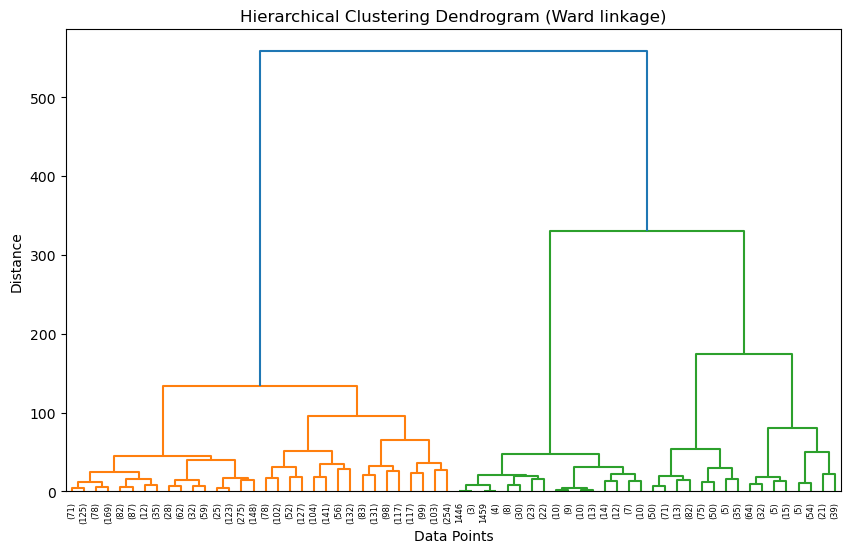

In [110]:
# Dendrogram visualization (Ward linkage)
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

##### **DBSCAN clustering visualization**

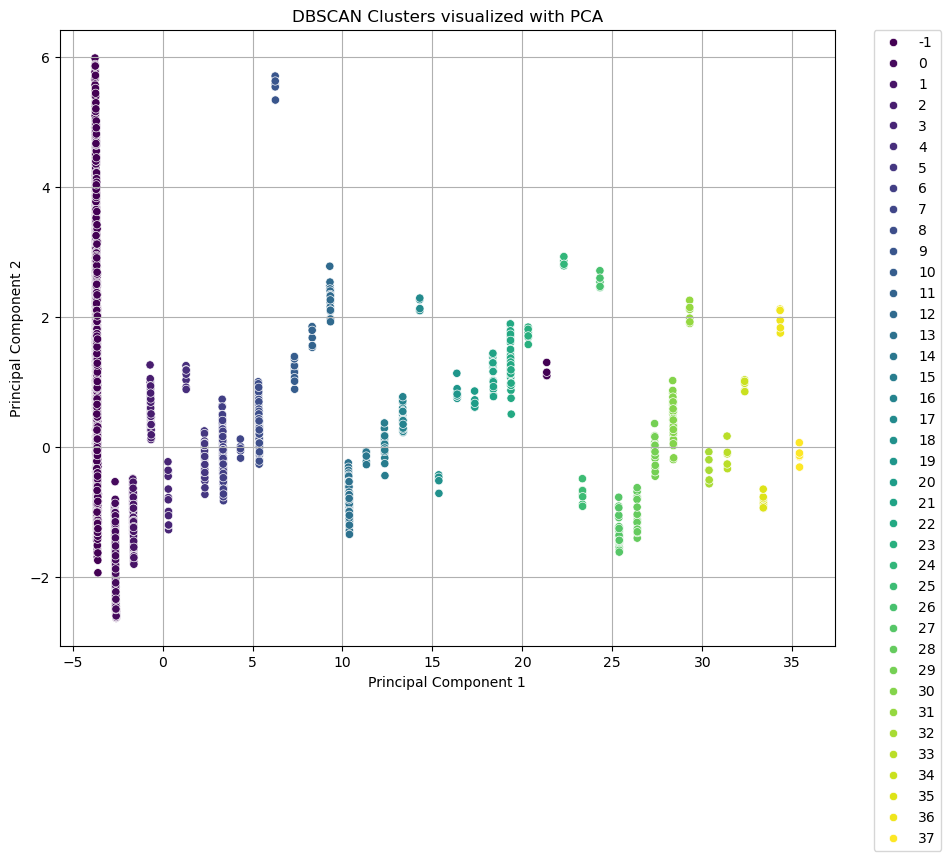

In [111]:
#Get labels
labels = DBSCAN(eps=0.5, min_samples=5).fit(df).labels_
DBSCAN_score = silhouette_score(df, labels)

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Create a DataFrame for PCA results and add cluster labels
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'], index=df.index)
df_pca['Cluster'] = labels

# Plot the DBSCAN clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', legend='full')
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Move legend outside, adjust as needed
plt.show()

## Evaluation and Performance Metrics:

#### 1.Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

#### **K-Means:**
K-Means partitions data into 𝑘 clusters by minimizing within-cluster variance.

**Silhouette Score:** Works well because K-Means always assigns every point to a cluster.

Interpretation: Higher score means clusters are compact and well-separated.

Limitation: Sensitive to choice of 𝑘. That’s why you often combine with the elbow method or gap statistic.


#### **DBSCAN:**
Density-based clustering; groups points that are closely packed, marking outliers as noise.

**Silhouette Score:** Trickier because DBSCAN can assign noise points (-1).You must check that at least 2 clusters exist (excluding noise) before computing silhouette score.

Interpretation:
- High score - dense, well-separated clusters.

- Low/invalid score → either too much noise or poor parameter choice (eps, min_samples).